# Part One: Setup and Loading in Datasets #

**1.1 Installing Dependencies/Setup**

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-2.9.1-cp310-cp310-win_amd64.whl (444.1 MB)
  Using cached tensorflow_gpu-2.9.1-cp310-cp310-win_amd64.whl (444.1 MB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
     ---------------------------------------- 7.2/7.2 MB 17.7 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached wrapt-1.14.1-cp310-cp310-win_amd64.whl (35 kB)
     --------------------------------------- 14.2/14.2 MB 22.6 MB/s eta 0:00:00
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.47.0-cp310-cp310-win_amd64.whl (3.5 MB)
  Using cached protobu

You should consider upgrading via the 'D:\ImageClassification\imageclassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.2.0
asttokens                    2.0.8
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.2.0
certifi                      2022.6.15
charset-normalizer           2.1.0
colorama                     0.4.5
cycler                       0.11.0
debugpy                      1.6.2
decorator                    5.1.1
entrypoints                  0.4
executing                    0.10.0
flatbuffers                  1.12
fonttools                    4.35.0
gast                         0.4.0
google-auth                  2.10.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.47.0
h5py                         3.7.0
idna                         3.3
ipykernel                    6.15.1
ipython                      8.4.0
jedi                         0.18.1
jupyter-client               7.3.4
jupyter-

You should consider upgrading via the 'D:\ImageClassification\imageclassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [48]:
import tensorflow as tfb
import os

In [49]:
#Lists the amount of GPUs avaliable
#gpu = tf.config.experimental.list_physical_devices('GPU')

In [50]:
#gpu

In [88]:
#Limits Tensorflow from using all of the VRAM in current GPU
#Tensorflow normally uses most/all of the VRAM in a GPU; this code prevents the OOM(Out of Memory) error 

gpus = tf.config.experimental.list_physical_devices('GPU')
#This limits the memory growth; only allows Tensorflow to use only the necessary about of memory it needs
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

RuntimeError: Physical devices cannot be modified after being initialized

**1.2 Remove Corrupted Images**

In [52]:
import cv2
import imghdr

In [53]:
#Directs the path to find the data directory w/ the images

data_dir = 'data'

In [54]:
#This command allows me to see the list of folders in the directory
#os.listdir(data_dir)

#This command allows me to loop through every item/image in that specific folder
#os.listdir(os.path.join(data_dir, 'sadimages'))

In [55]:
#Only allows images with these file paths
image_extensions = ['jpeg', 'jpg','bmp','png']

In [56]:
#test to be sure the image can be opened
#image should/ and is read as a numpy array

#img = cv2.imread(os.path.join('data','angryimages','Angry-Man.jpeg'))

In [57]:
#img.shape
#Reads (3744, 5388, 3)
#This means that it is:
# 3744 rows high
# 5388 columns (pixels) wide
# using 3 channels; which means it is a colored image

In [58]:
#Loops through every folder in the data directory
for img_class in os.listdir(data_dir):
    #This loops through every image in each subfolders
    #                              --> (data, happy), etc
    
    for img in os.listdir(os.path.join(data_dir, img_class)):
        
        #Loops through the folder and grabs every image
        #               -->    (data, happy, 1st image), etc
        img_path = os.path.join(data_dir, img_class, img)
        
        #This checks too see if the image is accepted 
        try:
            #Checks if the image can be opened in OpenCV
            image = cv2.imread(img_path)
            #Checks if image matches the accepted file extensions
            tip = imghdr.what(img_path)
            
            #If the image is not accepted/does not have the correct extension
            if tip not in image_extensions:
                print('This image {} is not accepted'.format(img_path))
                os.remove(img_path)
                #The user is alerted and it is removed
                
        except Exception as e:
            print('There was an issue with image {}'.format(img_path))
             #os.remove(img_path)

**1.3 Load Data**

In [59]:
# Allows the ability for data pipelines
# This allows larger datasets and gives repeatable steps 
#tf.data.Dataset

In [60]:
#Importing in NumPy
import numpy as np
from matplotlib import pyplot as plt

In [61]:
#Note to self: Good for image classification models
#tf.keras.utils.image_dataset_from_directory??

In [62]:
#Loads in our data (building the data pipeline)
#This uses the built in Keras data helper

data = tf.keras.utils.image_dataset_from_directory('data')

Found 324 files belonging to 4 classes.


In [63]:
#Allows the access of the generator from the data pipeline (loops through the pipeline)

data_iterator = data.as_numpy_iterator()

In [64]:
#Gets a new batch of images from the iterator
batch = data_iterator.next()

In [65]:
# Has the images represented as numPy arrays
batch[0].shape

(32, 256, 256, 3)

In [66]:
# The labels are represented by the integers 0-3; aligning with happy/sad/angry/suprised
batch[1]

array([2, 1, 0, 0, 0, 2, 3, 1, 0, 3, 1, 1, 0, 1, 1, 2, 3, 3, 0, 0, 0, 0,
       1, 1, 2, 1, 3, 1, 2, 3, 1, 0])

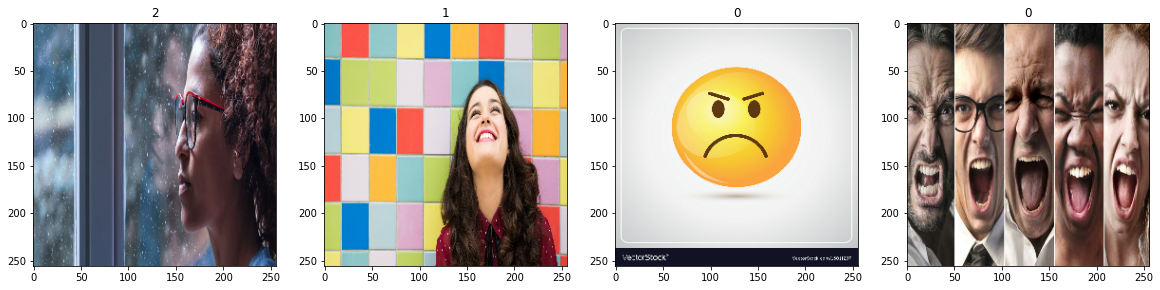

In [67]:
# This plot assigns the class to each image

#Allows  4 images to be shown at the same time
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    

In [68]:
#Based on the previous cell - the labels are as follows:
# 0 = Angry
# 1 = Happy
# 2 = Sad
# 3 = Suprised

In [69]:
#With DL models, the batch values should be as small as possible for optimization purposes
#To do this we divide it by its maximum size which is 255
#scaled = batch[0]/255

In [70]:
#scaled.min() -> Remains 0
#scaled.max() -> Now 1 instead of 255

# Part Two: Preprocecss Datasets #

**2.1 Scale Data**

In [71]:
#Allows us to apply the transformation through the pipeline
#Also increases the speed of accessing the data from the disk

# x is our images/ y is our labels
#This performs the scaling on the full dataset 

data = data.map(lambda x,y:(x/255, y))

In [72]:
# Directly accesses the generator from the pipeline and the next batch
# Automatically is shuffling so the same  batch is not grabbed
scaled_iterator = data.as_numpy_iterator()

In [73]:
batch = scaled_iterator.next()

In [74]:
#Has a batch that is between 0  and 1.
batch[0].max()

1.0

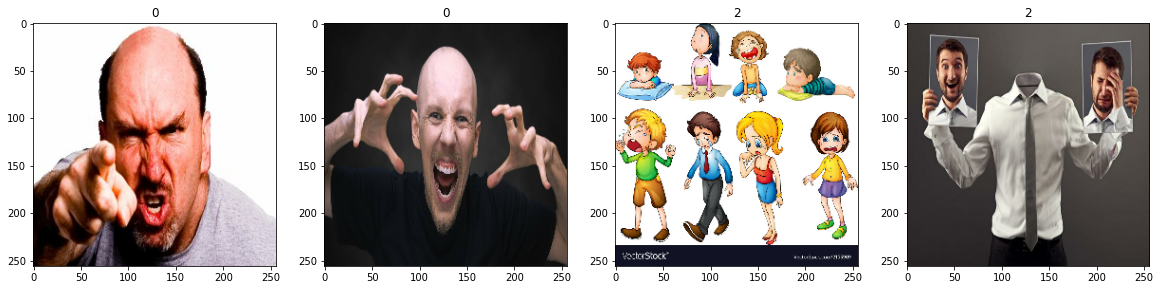

In [75]:
#Same as before; only difference now is that due to the potential secondary scaling
#Fixed by changing the .imshow from an integer to simply an image

fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    


**2.2 Split Data**

In [76]:
len(data)

11

In [77]:
#Shows how much of the data will be allocated for each part of the training

#During Training
#70% of the data will be used for training the deep learning model
train_size = int(len(data)*.7)
#20% of the data will be used for validation (valiating the model while training it)
val_size = int(len(data)*.2)

#Post Training 
#10% of the data will be used for testing (won't be used until the vey end, final stage)
test_size = int(len(data)*.1)+1

In [78]:
train_size + val_size + test_size

11

In [79]:
#Uses the take/skip methods in the Tensorflow dataset pipeline
#Take -> How much data/batches we are going to take in that partition
#Skip -> Skips the batches that have already been taken and moves to the batches that have not been

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Part Three: Deep Model #

**3.1 Build Deep Learning Model**

In [140]:
#Imports dependencies
#Uses the Sequential API from Tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [141]:
model = Sequential()

In [142]:
#Adds a convolutionary layer and a max pooling layer
#This adds in the first layer and its input
#This layer has 16 filters, which has a size of 3x3 and a stride of 1
#The activation relu takes in account non-linear patterns 

model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

#Flattens the MaxPooling layers to a single value
#Or in this instance a single dimension

model.add(Flatten())

#Creates fully connected layers; similar to a neural network
#The number here represents the number of neurons in that network

model.add(Dense(256, activation='relu'))

#Since this has a sigmoid activation, this returns a single output
#Represents a zero or a one since it has a sigmoid function (inverse of log function)


# ****** Potentially change this for larger dataset ******** #

model.add(Dense(4, activation='softmax'))

In [143]:
model.compile('adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics =['accuracy'])

In [144]:
#The modeled Deep Learning Network

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 30, 30, 16)     

**3.2 Training**

In [145]:
#Directs this to a (just created) log directory

logdir = 'logs'

In [146]:
#This callback can save the model at a certain checkpoint
#Logs out the model training as a training/ see how the model performed at a certain time

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [147]:
#model.fit is the training component of the neural network
#the history variable allows us to take the training/validation data and plot them

hist = model.fit(train, epochs = 30, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/30
7/7 [==============================] - 7s 580ms/step - loss: 1.3689 - accuracy: 0.3170 - val_loss: 1.2992 - val_accuracy: 0.4531
Epoch 2/30
7/7 [==============================] - 6s 560ms/step - loss: 1.3134 - accuracy: 0.3571 - val_loss: 1.1400 - val_accuracy: 0.4688
Epoch 3/30
7/7 [==============================] - 6s 586ms/step - loss: 1.0782 - accuracy: 0.5625 - val_loss: 1.0953 - val_accuracy: 0.4844
Epoch 4/30
7/7 [==============================] - 6s 562ms/step - loss: 0.9486 - accuracy: 0.6339 - val_loss: 1.3400 - val_accuracy: 0.4219
Epoch 5/30
7/7 [==============================] - 6s 562ms/step - loss: 0.9132 - accuracy: 0.6875 - val_loss: 0.7162 - val_accuracy: 0.8906
Epoch 6/30
7/7 [==============================] - 6s 549ms/step - loss: 0.7346 - accuracy: 0.7545 - val_loss: 0.6329 - val_accuracy: 0.7812
Epoch 7/30
7/7 [==============================] - 6s 572ms/step - loss: 0.5281 - accuracy: 0.7991 - val_loss: 0.5679 - val_accuracy: 0.7969
Epoch 8/30
7/7 [====

In [148]:
# 10st Attempt
#
# Expected results:
# Training Data: 
#      loss: decrease
#      accuracy: increase
#
# Validation Data: 
#      loss: decrease
#      accuracy: increase
#
# Outcome: 
# Training Data: 
#      loss: Decreased, 0.03
#      accuracy: Increased, reached 98 - 100% accuracy
#

**3.3 Plot Performance**

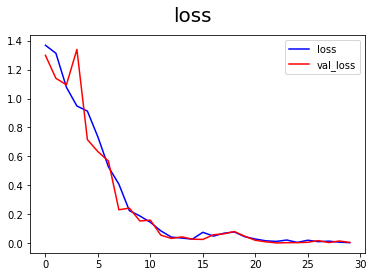

In [149]:
#Using MatplotLib for visualization purposes (Losses)

#Grabs plot of the loss and the val_loss
fig = plt.figure()
plt.plot(hist.history['loss'], color ='blue', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'red', label = 'val_loss')

#Creates a graph graphing the losses
fig.suptitle('loss', fontsize = 20)
plt.legend(loc="upper right")
plt.show()

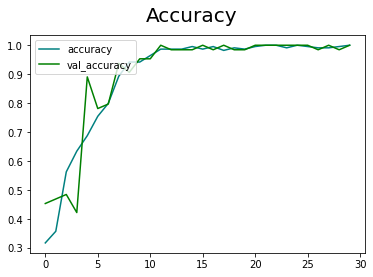

In [150]:
#Using MatplotLib for visualization purposes (Accuracy)

fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'green', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

# Part Four: Evaluate Performance #

**4.1 Evaluate**

In [198]:
#Imports different measures that are used for classification

from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [207]:
#Establish instances of each classification

pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [208]:
len(test)

2

In [217]:
#Looks through each of the batches for the testing

for batch in test.as_numpy_iterator():
    #X is equal to the image arrays
    
    X, y = batch
    yhat = model.predict(X)
    
    #updates on how each of these actually performs on our test data
    #pre.update_state(y, yhat, 2)
    #re.update_state(y, yhat)
    #acc.update_state(y, yhat)

1/1 [==============================] - 0s 45ms/step


In [224]:
print(batch[1])

[1 3 2 1]


In [212]:
tf Precision??

Init signature:
Precision(
    thresholds=None,
    top_k=None,
    class_id=None,
    name=None,
    dtype=None,
)
Source:        
@keras_export('keras.metrics.Precision')
class Precision(base_metric.Metric):
  """Computes the precision of the predictions with respect to the labels.

  The metric creates two local variables, `true_positives` and `false_positives`
  that are used to compute the precision. This value is ultimately returned as
  `precision`, an idempotent operation that simply divides `true_positives`
  by the sum of `true_positives` and `false_positives`.

  If `sample_weight` is `None`, weights default to 1.
  Use `sample_weight` of 0 to mask values.

  If `top_k` is set, we'll calculate precision as how often on average a class
  among the top-k classes with the highest predicted values of a batch entry is
  correct and can be found in the label for that entry.

  If `class_id` is specified, we calculate precision by considering only the
  entries in the batch for whi

In [180]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy}')

Precision:0.0, Recall:0.0, Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.0>>


**4.2 Test**